In [5]:
import migrids_lite as mlt
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# get all the data
all_data = pd.read_csv('example_data.tab', delimiter='\t')

# get the electric load from the data
electric_load = mlt.EnergyType.EnergyType('electric_load', all_data['load'])

In [3]:
# create a generator, this one is 400 kW
four_hund = mlt.Generator.Generator('four_hund', 400, 0.30, {0.50: 14, 1.00: 28})

# build the power house, this is required even if there's only 1 generator
power_house = mlt.Powerhouse.Powerhouse((four_hund,))

In [4]:
# calculate diesel only usage
diesel_src = mlt.System.System(electric_load, power_house, 'd')

# print some useful things
print(diesel_src.src.frame)
print(diesel_src.fuel_usages.totals)

calculating in diesel only mode
    diesel_out  resource  curtailed
0          120         0          0
1          250         0          0
2          240         0          0
3          230         0          0
4          220         0          0
5          200         0          0
6          190         0          0
7          220         0          0
8          215         0          0
9          240         0          0
10         250         0          0
11         255         0          0
12         245         0          0
13         240         0          0
14         230         0          0
15         250         0          0
16         255         0          0
17         260         0          0
18         245         0          0
19         235         0          0
20         220         0          0
21         200         0          0
22         230         0          0
23         235         0          0
24         240         0          0
{'total_fuel_used': np.float64(3

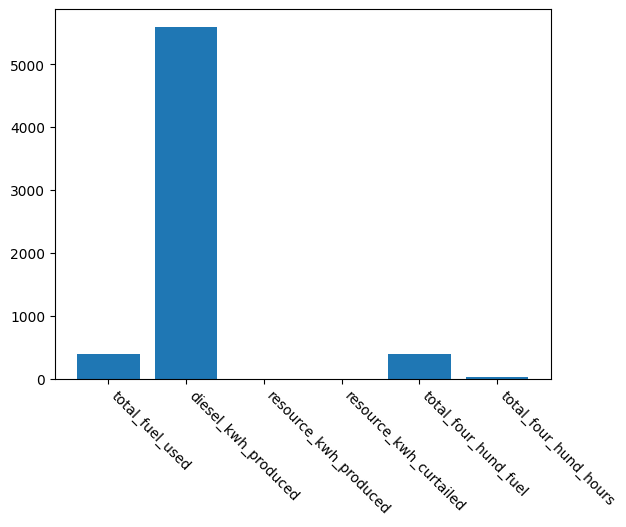

In [9]:
# let's plot the values
plt.bar(diesel_src.fuel_usages.totals.keys(), diesel_src.fuel_usages.totals.values())
plt.xticks(rotation = -45, ha='left')
plt.show()